In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# %load_ext line_profiler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Setup the models that we will test

In [34]:
from lotka_volterra_model import LotkaVolterraModel
from dimerization_model import DimerizationModel
from gene_toggle_model import GeneToggleModel
# from goutsias_model import GoutsiasModel

from model_data import ModelData
        
all_model_data = []
initial_distributions = []
max_r_for_all_models = []

########################
# Lokta-Volterra model
########################
all_model_data.append(ModelData(LotkaVolterraModel(),
                                ['A', 'B'],
                                0.2,
                                'Lotka-Volterra'))
initial_distributions.append({(300, 100): 1.})
max_r_for_all_models.append(200)

########################
# Dimerization model
########################
all_model_data.append(ModelData(DimerizationModel(),
                                ['mRNA', 'protein', 'dimer'],
                                0.05,
                                'Dimerization'))
initial_distributions.append({(10, 10, 0): 1.})
max_r_for_all_models.append(100)

########################
# Goutsias model
########################

#TODO molecule names and initial distribution

# all_model_data.append(ModelData(GoutsiasModel(),
#                                 ['A', 'B', 'C', 'D', 'E', 'F'],
#                                 0.01,
#                                 'Goutsias'))
# initial_distributions.append({(10, 10, 0): 1.})
# max_r_for_all_models.append(100)


# Generate the plots comparing the support sizes to the probability lost

Lotka-Volterra
1
0.999999999999993
11
0.9999999999900663
21
0.9999999869064639
31
0.9999992047267129
41
0.9999805599147896
51
0.9997500708508483
61
0.9980652628344114
71
0.9900543370113141
81
0.9634279946758348
91
0.8983505027672757
101
0.7776271280481423
111
0.6044750165824202
121
0.41018618785221445
131
0.2380643584439415
141
0.11666421695718936
151
0.04794397511275434
161
0.01647987046213387
171
0.004739260474648609
181
0.0011427031596252686
191
0.0002317810122339979
error target: 2.32e-04
eps: 5.00e-01, prob lost: 1.00e+00
eps: 2.50e-01, prob lost: 1.00e+00
eps: 1.25e-01, prob lost: 1.00e+00
eps: 6.25e-02, prob lost: 1.00e+00
eps: 3.12e-02, prob lost: 1.00e+00
eps: 1.56e-02, prob lost: 1.00e+00
eps: 7.81e-03, prob lost: 1.00e+00
eps: 3.91e-03, prob lost: 1.00e+00
eps: 1.95e-03, prob lost: 9.95e-01
eps: 9.77e-04, prob lost: 8.44e-01
eps: 4.88e-04, prob lost: 6.73e-01
eps: 2.44e-04, prob lost: 5.08e-01
eps: 1.22e-04, prob lost: 3.74e-01
eps: 6.10e-05, prob lost: 2.70e-01
eps: 3.05e-0

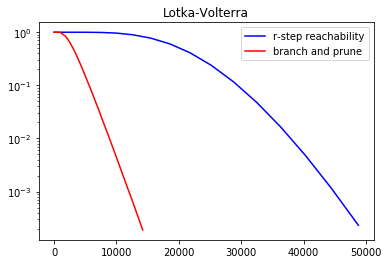

Dimerization
1
0.9999999999999994
11
0.9999999999106802
21
0.9999959775462772
31
0.997621466648123
41
0.9152818423696771
51
0.5333047751107497
61
0.14308460712157856
71
0.0180822455585805
81
0.0012496704993059991
91
5.409696747022495e-05
error target: 5.41e-05
eps: 5.00e-01, prob lost: 1.00e+00
eps: 2.50e-01, prob lost: 1.00e+00
eps: 1.25e-01, prob lost: 9.97e-01
eps: 6.25e-02, prob lost: 9.57e-01
eps: 3.12e-02, prob lost: 6.59e-01
eps: 1.56e-02, prob lost: 4.47e-01
eps: 7.81e-03, prob lost: 3.21e-01
eps: 3.91e-03, prob lost: 2.37e-01
eps: 1.95e-03, prob lost: 1.77e-01
eps: 9.77e-04, prob lost: 1.34e-01
eps: 4.88e-04, prob lost: 1.10e-01
eps: 2.44e-04, prob lost: 8.70e-02
eps: 1.22e-04, prob lost: 6.01e-02
eps: 6.10e-05, prob lost: 4.08e-02
eps: 3.05e-05, prob lost: 2.79e-02
eps: 1.53e-05, prob lost: 1.94e-02
eps: 7.63e-06, prob lost: 1.41e-02
eps: 3.81e-06, prob lost: 1.00e-02
eps: 1.91e-06, prob lost: 7.57e-03
eps: 9.54e-07, prob lost: 5.99e-03
eps: 4.77e-07, prob lost: 4.58e-03
eps:

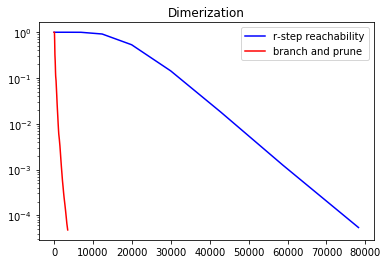

In [35]:
import r_step_reachability
import branch_and_prune
import gorde

from get_generator import get_generator
from scipy.sparse.linalg import expm_multiply

for model_data, init_dist, max_r in zip(all_model_data, initial_distributions, max_r_for_all_models):
    print(model_data.model_name)
    r_values = range(1, max_r, 10)
    r_step_support_size = np.zeros(len(r_values), dtype=np.int)
    r_step_prob_lost = np.zeros(len(r_values), dtype=np.float)
    
    for i,r in enumerate(r_values):
        print(r)
        support = r_step_reachability.get_support(model_data, init_dist, r)
        generator, initial_dist, index_to_state = get_generator(model_data, init_dist, support)
        res_dist = expm_multiply(generator * model_data.t, initial_dist)
        
        r_step_support_size[i] = len(support)
        r_step_prob_lost[i] = res_dist[0]
        print(res_dist[0])
    
    branch_prune_support_size = []
    branch_prune_prob_lost = []
    
    eps = 1.
    prob_lost = np.inf
    print('error target: {:.2e}'.format(r_step_prob_lost[-1]))
    while prob_lost > r_step_prob_lost[-1]:
        support, generator, initial_dist = branch_and_prune.get_support(model_data, init_dist, eps)
        res_dist = expm_multiply(generator.T * model_data.t, initial_dist)
        branch_prune_support_size.append(len(support))
        branch_prune_prob_lost.append(res_dist[0])
        
        eps /= 2.
        prob_lost = res_dist[0]
        print('eps: {:.2e}, prob lost: {:.2e}'.format(eps, prob_lost))
        
    plt.plot(r_step_support_size, r_step_prob_lost, color='blue', label='r-step reachability')
    plt.plot(branch_prune_support_size, branch_prune_prob_lost, color='red', label='branch and prune')
    plt.legend()
    plt.yscale('log') #base 10
    plt.ylabel('L1 error')
    plt.xlabel('Support size')
    plt.title(model_data.model_name)
    plt.show()